# CRISP - DM
1. Business Understanding
2. Data understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

So...you want to do the machine learning eh?

Well you've come to the right place! 

In this five part series, we're going to go through the fastest possible way to build train and save a ma chine learning model. 

But first...the most important part of building any machine learning model is just a few letters. 

BDDMED

If there's anything else you take from this course it needs to be that. 

Here's an easy way to remember it. 

Barry Drove Directly to the Medical Emergency Department

Now you're probably thinking...

WHAT

THE 

HELL

Well BDDMED stands for:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling 
5. Evaluation
6. Deployment

These six steps underpin ALLL of Data Science...whether you're writing a simple linear regression or building a siamese neural network. 

every 
DATA SCIENTIST 
<b>UNDERSTANDS THIS</b>. 

They're the six critical steps for being successful with machine learning or Data Science. BDDMED comes from the world famous CRISP-DM model for machine learning. It's the undisputed and widely agreed upon framework for all data mining (in the old language) regardless of the problem. 


So...what the hell do they mean.

# Importing Data

Alrighty, so first thing's first we need to get some data to do data science. 

In this case, we are going to be messing around with a little ol CSV. 

And we're going to be using one of the most powerful Python tools on earth. 

PANDAS.

No, I'm not talking about the cute, clumsy, cuddly we all know and love. 

I'm talking about the Python package.  Pandas helps us work with our data in a dataframe (fancy word for a table).

To import pandas all ya need to do is import it with the following command. 

In [1]:
import pandas as pd

Presto! Pandas imported. 

You can then import data from CSV's using the read_csv function. 

In [2]:
# comment
df = pd.read_csv('dataset.csv')

And take a look at the first five rows using the head() method. 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Understanding

Now cast your mind back to lesson numero uno. We talked about three basic frameqwork for all machine learning CRISP-DM. BDDMED?!

Barry drove directly to the Medical Emergency Department. 

The second step in the data science lifecycle was to understand our data aka DATA UNDERSTANDING. 

So...we're about to do just that. 

<b>Checking the number of records</b>
<p>The first check we're going to do is have a look at the total number of records we've got on hand. This can be done using the Python len() function. All you have to do is pass the data to the function like so.</p>

In [4]:
len(df)

7043

So, we can see there that there are around 7043 records that we have to play with. 

The next thing we should probably review are the columns that are within our dataset. Knowing what we have on hand is important as these are the features that we're going to need to use to predict our target variable. You can review the columns by accessing the column attribute. 

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b>Checking datatypes</b>
<p>Butttt...that's not really that useful. It would probably be more useful to understand what the datatypes for those columns are.</p>
<p>Datasets you might receive, could sometimes come with a data dictionary. But on the off change they don't it's realitively easy to create one yourself by checking the datatypes with the dtypes attribute above and printing out the unique values in each column with the unique() method below.</p>

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

This tells us a little about what we've actually got to work here. Now cast your mind back to the business understanding segment. The customer told us that they wanted to predict which of their customers they were likely to lose so they could try to do something about it. 

This is a form of supervised learning, and specifically it's binary classification. 

All we need to predict is if the customer is going to leave (1) or stay (0). This type of use case is normally referred to as Churn prediction. And lucky for us, there's a column in our dataset called Churn!

We can also take a look at some of our columns by using the unique() method. This gives us a feel for what data we have at hand. 

In [7]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

customerID 7043 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender 2 ['Female' 'Male']
SeniorCitizen 2 [0 1]
Partner 2 ['Yes' 'No']
Dependents 2 ['No' 'Yes']
tenure 73 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 2 ['No' 'Yes']
MultipleLines 3 ['No phone service' 'No' 'Yes']
InternetService 3 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 3 ['No' 'Yes' 'No internet service']
OnlineBackup 3 ['Yes' 'No' 'No internet service']
DeviceProtection 3 ['No' 'Yes' 'No internet service']
TechSupport 3 ['No' 'Yes' 'No internet service']
StreamingTV 3 ['No' 'Yes' 'No internet service']
StreamingMovies 3 ['No' 'Yes' 'No internet service']
Contract 3 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 2 ['Yes' 'No']
PaymentMethod 4 ['Electronic check' 'Mailed check' 'Ban

<b>Summary Statistics</b>
<p>Onwards....now that we know we have the column required for our specific task we can do a little more exploratory analysis to get a feel for our dataset. A good way to quickly do this is to generate summary statistics. You can do this using the describe() method.</p>

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can do the same for categorical features as well. 

In [9]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3331-HQDTW,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<b>Reviewing Categorical Variables</b>
<p>It looks as though some of the columns should really be binary encoded values. These are columns which only contain two unique values. The most common ones we can see above are those that contain 'Yes' and 'No'. We can print out these columns relatively easily by iterating through the columns again. </p>

In [10]:
df['SeniorCitizen'].dtype =='object'

False

In [11]:
less_than_2 = []
for col in df.columns:
    if len(df[col].unique()) == 2 and df[col].dtype=='object':
        print(col)
        less_than_2.append(col)

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn


By appending these values to the array less_than_2, we can loop through these during the data preparation step and encode them into binary values. This process is also known as one-hot-encoding. 

In [12]:
less_than_2

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

<b>Looking for Missing Values</b>
<p>It's always good practice to review missing values. These will cause issues when we go to train our machine learning model later on so it's easier to know upfront if you're going to need to deal with them. We can chain two methods isnull() and sum() to get a count of the number of missing values there might be within our DataFrame.</p>

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>Visualising our dataframe</b>
<p>It's always good practice to visualise your data while you're getting an understanding of what you're working with. It's hard to pick up errors or relationships without LOOKING at them.</p>

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

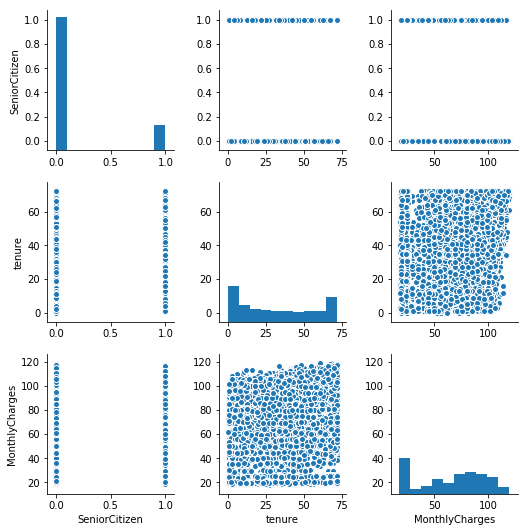

In [15]:
plt.figure(figsize=(14,14))
sns.pairplot(df)
plt.show()

Now, it's pretty obvious that we have some binary variables that haven't been encoded quite right. Not to worry we're going to fix this up and revisualise in the next lesson!

<b>Summary</b>
Alrighty, you're now a Data Understanding pro. Just to recap you went through how to:
- Check the number of records using len()
- Look at columns using df.columns
- Review data types using df.dtypes
- See unique values using df['column'].unique()
- Generate summary statistics using df.describe() and df.describe(include=['object'])
- Find null values using df.isnull().sum()
- And last but not least visualised your data using sns.pairplot(df)

Not a bad start!

Stay tuned in the next lesson we're going to go through how to fix some of those issues we found during these steps!

Your Friendly Neighbourhood Data Understander
Nick

P.s. Did you find any other issues in the data? Make a note of them so you're able to fix them during data preparation!


# Data Preparation

"POW"

"KAPOW" 

"YABLAMO"

That's the sound of you fighting off all those data errors. 

Wait...what, you ain't done that yet!

Oh that's right we're doing it today. 

Get ready to hone your data wrangler lasso. 

We're about to get data fixin'

<b>1. Fix up data types</b>
<p>
One of the biggest issues that you found yesterday was the fact that some of the feature columns were the wrong data type. 
<br />
<br />
There were a whole bunch (gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, Churn) that should've been binary aka 1 or 0 instead of being Yes or No. 
<br />
<br />
On top of that, the TotalCharges should really have been number rather an a string. 
<br />
<br />
Now this just won't do. So we're going to have to fix it up. 
<br />
<br />
<b>Side Bar:</b> It's probably useful to point out that a HUGGEEE part of a Data Scientist's job is making sure you've got well formatted and cleaned data. 
<br />
<br />
<i>As they say "Rubbish in, rubbish out", the same goes for data science, "Rubbish data, rubbish model". </i>
<br />
<br />
Alright, let's get cracking and fix this up. </p>

The first thing we need to do is one hot encode the values that only have two variables. 

We need to do this in order to pass our data to the ML algorithms later on in the Modelling step of BDDMED. We're doing this step now to save memory during training. Eventually we'll one-hot-encode all the categorical variables but more on that later. 

We can one hot encode the columns with issues by looping through our array that held them (less_than_2) and using the .apply() method and lambda function to update each value within the column. 

In [16]:
less_than_2

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [17]:
for col in less_than_2:
    if col == 'gender':
        df[col] = df[col].apply(lambda x: 1 if x=='Female' else 0)
    else:
        df[col] = df[col].apply(lambda x: 1 if x=='Yes' else 0)

And presto we've now updated the required columns to integers where needed. 

In [18]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

Now, if you take a quick look you can see that TotalCharges is still an object. We need to convert this to a float aka a number with decimal places. 

Before we can do that we need to update some blank values that are hiding within the dataset. You can see below that there are a bunch of rows that have a blank space as a value within the TotalCharges column. Before we try to convert the datatype we need to replace these with 0. 

In [19]:
df[df['TotalCharges']==' '].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,1,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,0,0,0,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,1,0,1,1,0,1,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,0,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,1,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,,0


In [20]:
df['TotalCharges'].replace(' ', 0, inplace=True)

Now we can see that those rows have now been updated, so there aren't any more rows with a ' ' value anymore. 

In [21]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Onto the last step we can cast the TotalCharges column to a float using the .astype() method. 

In [22]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

Annnnnnd we're done for that step. You can see below that Total Charges is now showing up as a float. 

In [23]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

<b>Side Bar:</b> <br /> 
Now that we've got our data in a better state. We can actually perform some more useful analysis. This is common in data science, you might have to perform some quick data preparation to get a better handle on data understanding. It's meant to be an ITERATIVE process. 

A really quick bit of analysis you can do is to look at correlation between the feature columns (everything except Churn) and our target (Churn) using the .corr() method. 

In [24]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.011754,0.014569,0.000080,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942
PaperlessBilling,0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825
MonthlyCharges,0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356
TotalCharges,0.000080,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324
Churn,0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000


That's a heap of numbers amirite? 

It's a whole heap easier to visualise this using our trusty old friend seaborn. 

You can use the seaborn heatmap to visualise correlation. 

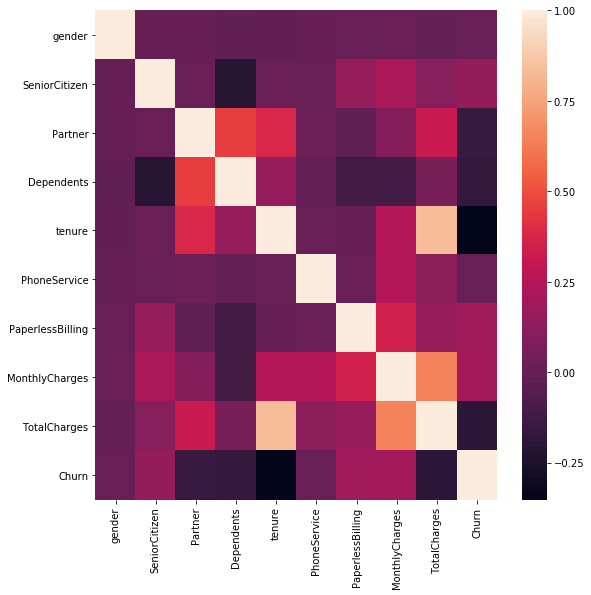

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())
plt.show()

You can see that tensure and TotalCharges are relatively negatively correlated with Churn. Meaning that historically customers that have stayed for a long time and have spent a larger amount of money are more likely to stick with the company.

<B>2. Dropping identifier columns</B><br />
Now one of the things that we noticed when checking counts on the feature columns was that the customerID column had completely unique features. 

Now, for our purposes we don't need a unique identifier column...so we're going to drop it like it's hot.  

In [26]:
df.drop('customerID', axis=1, inplace=True)

Annnd, it's gone. 

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b>3. One-Hot Encoding The Rest of the Variables</b>
Remember when I said we were going to talk more about one-hot encoding categorical columns. 

Well...

THE TIME IS NOW. 

The machine learning algorithms that we're using can't handle text based values. So, what we do to get around this is to one-hot encode them. 

...

<i>"What the hell does that mean?"</i> 

Let's demonstrate. One of the columns that we've got in our feature set is called MultipleLines. This feature tells us whether or not the customer has multiple phone lines with our client. Soooo...if we take a look at the values in that column we can see that there are three unique values. 

In [28]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

These are 'No phone service', 'No' and 'Yes'. Now, we can just do what we did with the categorical features that had 2 unqiue values because what would we set the third value to be? 

We can't set it to 2 as that would apply magnitude to our feature rather than leaving it as binary. 

What we can do however is one-hot-encode the column. This will create a new column for each unique value (No, Yes, No phone service) and set the value to 1 or 0 depending on what category that row fell into. 

This can be done using the .get_dummies() method from Pandas. 

In [29]:
pd.get_dummies(df['MultipleLines']).head()

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


See the difference? We've now converted the categorical features into a format that the algorithms will be able to understand. We can do this to our entire DataFrame as well. 

In [30]:
abt = pd.get_dummies(df)

In [31]:
abt.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [32]:
abt.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

<b>4. Create training and testing datasets</b> <br /> 
Now that we've done all of our data preparation there's just two steps left. We need to separate our data into the feature columns and our target like so...

In [33]:
y = abt['TotalCharges']
X = abt.drop('TotalCharges', axis=1)

And then we need to split our data into training and testing. This helps evaluate how our model will perform in the real world and helps us balance the bias/variance trade off. We can do this with the help of the train_test_split function from scikit learn. 

In [36]:
random_state=1234

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random_state)

In [38]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

4930 2113 4930 2113


Phew...that's a wrap...your data preparation days are done...for today. 

Just to reflect on how much you crushed it...here's what you did:
- Fixed up all the data types
- One-hot-encoded your dataset using pandas get_dummies
- Created the training and testing dataset for modelling
- Performed pearsons correlation analysis and visualisation

Get excited....for tomorrow....we march into the land of....

*INSERT DRUMROLL HERE*

<b>ALGORITHMS!</b>

You'll get to start throwing your data at some cutting edge machine learning algorithms and start building some models. 

See ya tomorrow!

Your Human Data Preparator, <br />
Nick

# Modelling

It's so bright...

The heavens are opening up...

The light hitting your face is warm...

You feel like you're floating on a breeze...

In the distance you see a small figure. You're not sure what it is.

As you keep looking it starts to get bigger. 

And BIGGER. 

AND <b>BIGGER.</b>

The light is so bright. It's a giant golden oven!

This...its the Alphamaster Machine Learning Convention Oven 3000. 

You put data in, let it cook for a little while and out comes a predictive model!

Today...you're going to learn how to cook with bunch of different types of ovens.

<i>"Ovens...what?"</i>

MACHINE LEARNING ALGORITHMS ARE LIKE <s>ONIONS</s> OVENS. 

You put data in and you're able to get predictions out. 

Just like some cooking methods and ovens perform better than others for cooking certain things. Some machine learning algorithms perform better than others on certain types of data. 

<b>So how do you pick the right algorithm?</b><br />
Well, just like cooking has envolved for years through trial and error. Machine learning has really done the same. 

<b>1. Importing libraries</b><br />
Alrightyy...first thing's first. 

We're going to import a whole bunch of different libraries to help along the way during our modelling process. 

The first and probably one of the most important is going to help you build a machine learning pipeline. 

Think of it as a conveyor belt for your data. 

The pipeline will perform a transformation to each part of your data on it's way to the oven. 

To do it we're going to use make_pipeline. 

In [40]:
from sklearn.pipeline import make_pipeline

Then we're going to use StandardScaler as one of our core transformations to our data. It takes our data and standardises it so that it's on the same scale as the rest of our data. This ensures that the algorithms treat the features as equals regardless of magnitudes. 

This is from the preprocessing part of scikit learn. 

In [41]:
from sklearn.preprocessing import StandardScaler

Then le piece de resistance...the algorithms. I've just taken a bunch of my favourites but you can choose your own from here ,INSERT MORE HERE. 

Each of these use different methods to do the same thing. 

They take in data and try to explain what factors are driving the target variable. 

Think of the oven analogy, you put raw ingredients (feature variables aka X) in the oven. You then leave it for a little while to cook (training) at a certain temperature. You might change the temperature depending on the results you've had in the past (hyperparameter tuning). But ultimately the outcome is a cake (predictions). 

The algorithms below are really just different types of ovens. They ultimately aim to do the same thing...it's just that some are better at turning your raw ingredients (data) into cake (predictions). 

In [43]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<b>2. Make some pipelines! </b>

What are pipelines again?

Think of them as a conveyor belt for your ingredients before they're baked. 

Here we're building a pipeline that applies the Standard Scaler which converts our values into something known as a z score. 

This is a fancy way of saying it subtracts the the average of the column and divides it by the standard deviation. 

Or in pseudo code, it looks a little like this:
z score = (value in the column - average value for that column) / standard deviation

Then you're creating a new copy of the algorithm and storing it in a dictionary. 

<b>N.B.</b> This is going to help you later on when we get to tuning your algorithms. 

In [44]:
pipelines = {
    'rf':make_pipeline(StandardScaler(), RandomForestRegressor(random_state=random_state)),
    'gb':make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=random_state)),
    'enet':make_pipeline(StandardScaler(), ElasticNet(random_state=random_state)),
    'ridge':make_pipeline(StandardScaler(), Ridge(random_state=random_state)),
    'lasso':make_pipeline(StandardScaler(), Lasso(random_state=random_state))
}

<b>3. Setup a tuning grid</b><br />
Remember when I said that when you're cooking your ingredient you might change the temperature to get a better cake. 

Well...

In machine learning this process is known as hyperparameter tuning, sometimes referred to as HPO or hyperparameter optimization. 

You do it using something called a hyperparameter grid. 

<b>HOLD UP</b></br></br>

<i>"What the hell is a hyperparameter?"</i>

Hyperparameters are values that you can change to influence how a machine learning algorithm goes about learning from your data. 

Just like you can change the temperature on an oven. You can change a hyperparameter that's attached to an algorithm. 

This may make the algorithm train (cook) faster or slower, it might also make it more accurate in it's final outcome (or less accurate). 

<i>"So how do I know what hyperparameters to choose?"</i><br />
I remember asking myself the same question. 

Luckily...you can use a function called GridSearch to search through all the hyperparameters in the hyperparameter grid. This will allow you to automatically choose the best algorithm and the best hyperparameters for your data!

To setup your grid you're going to do something similar to what you did when creating your pipelines. 

Each algorithm will have it's own grid and those grids will be stored together in a python dictionary. 

In [45]:
grid = {
    'rf':{'randomforestregressor__n_estimators':[10,20,30]},
    'gb':{'gradientboostingregressor__alpha':[0.5,0.9,0.99]},
    'enet':{'elasticnet__alpha':[0.5,0.9,0.99]},
    'ridge':{'ridge__alpha':[0.5,0.9,0.99]},
    'lasso':{'lasso__alpha':[0.5,0.9,0.99]}
}

<i>What's 'randomforestregressor__n_estimators'?</i><br />
The first part randomforestregressor is the name of the pipeline that is generated by the make_pipeline function from step two. This allows you to identify which paramater for which algorithm you're tuning. The second part n_estimators is the hyperparameter you're tuning. The array attached to that is the range of values you're testing our during the grid search. 

You can check out all the parameters attached to an algorithm like so...

In [ ]:
Lasso().get_params()

<b>4. Train your model using Grid Search</b><br /> 
Now's the time to get cooking. 

As part of using GridSearch you're also going to put your data through a process known as cross validation. This holds our a section of your data and tests it to make sure the algorithm is learning to predict well. 

This can be done using GridSearchCV from scikit learn. 

In [46]:
from sklearn.model_selection import  GridSearchCV

Then for each model within your pipeline...you're going to start cooking. 

This really happens in three key parts. 

For a given model...

First, you create a new instance of the GridSearchCV class. 

Second, you train the algorithm using your X and Y data.

Third, you save the model to a fit_models dictonary.

In [47]:
fit_models = {}
for algo, pipeline in pipelines.items():
    # 4.1 Create a Grid Search CV instance
    model = GridSearchCV(pipeline, grid[algo], cv=10, n_jobs=-1)
    # 4.2 Fit the model
    model.fit(X_train, y_train)
    # 4.3 Save it to the fit models dictionary
    fit_models[algo] = model
    print(algo, 'model has been fit.')

rf model has been fit.
gb model has been fit.
enet model has been fit.
ridge model has been fit.
lasso model has been fit.


The reason you save it to a dictionary will become more obvious in the next class. 

For now...bask in the glow...you just created a production quality machine learning model!

YEEEHOOOOO. 

<b>Let's recap, today you:</b><br />
1. Imported the required libraries for modern machine learning
2. Setup machine learning pipelines and used StandardScaler
3. Constructed a hyperparameter tuning grid for HPO
4. Used Grid Search CV to train your model

You're just one last step away from the final class! 

In the next class you'll learn how to evaluate your model and generate predictions!

The Mad Modeller, 
Nick

P.s. I may have simplified a lot of these concepts...if there's any you'd like to know more about join bleh...

# Evaluation

I just realised...

Yesterday you baked a cake...

But I didn't even offer you a slice...

I left you hanging

ALL GOOD!

We can fix that, because.....

<b>TODAY YOU'RE MAKING PREDICTIONS!</b><br/> 

Before we do that, let's quickly recap on what you've done so far. 
Lesson 1: CRISP-DM and imported Data
Lesson 2: Data Understanding - summary stats, missing values and visualisation
Lesson 3: Data Preparation - fixing data types, one hot encoding, X and Y setup, correlation
Lesson 4: Modelling - pipelines, hpo and grid search

Lesson 5 puts a great big tick on one of the most important components of CRISP-DM....EVALUATION. 

<i>Q: "Why is it so important?"</i>
A: Because it gives us an indication of how well our model is performing and how well it will likely perform once we release it into the wild when it's deployed. 

Plus...if your model sucks...it can also tells that maybe you need to spend a bit more time at each one of the CRISP-DM steps.

<b>1. Making Predictions</b> <br /> 
Before you take the first step and start evaluating your model. 

Let's quickly make some predictions to make sure everything looks kosher. 

Cast your mind all the way back to yesterday...when you saved each fit model into a dictionary called fit_models. 

You can now use that same dictionary to access the models that have already been trained. 

In [48]:
fit_models

{'enet': GridSearchCV(cv=10, error_score='raise',
        estimator=Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=1234, selection='cyclic', tol=0.0001, warm_start=False))]),
        fit_params=None, iid=True, n_jobs=-1,
        param_grid={'elasticnet__alpha': [0.5, 0.9, 0.99]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=0),
 'gb': GridSearchCV(cv=10, error_score='raise',
        estimator=Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
           

Inside of that lil' old dictionary there's fit models. 

One for each algorithm that you used during the grid search. 

Let's say you wanted to make a prediction using the Random Forest Regressor algorithm. 

You can access it like this. 

In [50]:
fit_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...imators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

And make a prediction by using the .predict() method. 

In [51]:
fit_models['rf'].predict(X_test)

array([3132.075     , 1110.35333333, 1499.63      , ..., 2084.47166667,
        524.5       , 1618.32333333])

Presto! You just made your first set of predictions!

*FIREWORKS ARE GOING OFF IN MY OFFICE*

*I'M POPPING CHAMPAGNE FOR YOU*

But seriously...that's a huge achievement! 

Great job...but it's not over yet. 

You've got two more things to do before you're done. 

<b>2. Evaluating your model </b><br /> 
How you evaluate your model will be a little different each time depending on what your goal is. 

But generally, it follows a process that looks a little like this. 

1st: Split your data into training and testing partitions (DONE) <br />
2nd: Train a model on your data from the training set (DONE)<br />
<b>3rd: Pick a scoring metric that's relevant to your goal </b><br />
<b>4th: Calculate the metric score using the test data</b><br /> 

So you've only have the 3rd and 4th steps left to do for evaluation. 

I'm going to save you a bit of time, the metric you're going to be using to evaluate your model is Mean Squared Error (MSE). You can access it from scikit learn metrics. 

In [52]:
from sklearn.metrics import mean_squared_error

Whenever evaluating a metric it's good to know what the score means. In this case, MSE is a measure of how far the prediction is from the true value on average. 

Knowing this, you want the MSE value to be as low as possible. 

<b>Know your metrics</b><br />
LOW MSE - GOOD <br />
HIGH MSE - BAD <br />

You can loop through each model inside of the fit_models dictionary and calculate mse using the mean_squared_error() score that was just imported. 

In [53]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('MSE for', algo, 'is', mean_squared_error(y_test, yhat))

MSE for rf is 7169.195556476935
MSE for gb is 10285.673375545595
MSE for enet is 606950.5032082931
MSE for ridge is 485605.0006509641
MSE for lasso is 485571.2298561204


Knowing what we just went through, that a lower MSE is better. 

You can tell that the Random Forest Regressor is performing the best. 

Now what...?

<b>3. Saving your models</b>

You need to save and deploy your model. You can do this using another library called pickle. 

You're only going to save the best model so that it can later be deployed into production. 

<i>How do we do this?</i> 
You already know that the best model is the one built using the Random Forest Regressor algorithm. You just need to grab the model that has the best hyperparameters. You can extract this using the best\_estimator\_ attribute 

In [63]:
bestmod = fit_models['rf'].best_estimator_

Make sure this works by running a prediction using the best model. 

In [64]:
bestmod.predict(X_test)

array([3132.075     , 1110.35333333, 1499.63      , ..., 2084.47166667,
        524.5       , 1618.32333333])

It's all looking good. Let's save this using pickle. 

In [65]:
import pickle as pkl

In [71]:
with open('saved_model.pkl', 'wb') as f:
    pkl.dump(bestmod, f)

You should now have a saved model binary stored to your local drive called <i>saved_model.pkl</i>.<br />

<img src='https://i.imgur.com/LCJSm4Y.png'>

<b>4. Reloading the model</b><br />
BRACE YOURSELF!

We're about to delete our model!

But that's cool because we're going to reload it anyway. 

In [72]:
del bestmod

*POOOOF*

It's gone. 

Just like that. 

You:...
You:...
You:...
You:SO HOW DO WE GET IT BACK NICK!

Just like you used pickle to save the file, you can use it to bring it back to life. 

In [74]:
with open('saved_model.pkl', 'rb') as f:
    model = pkl.load(f)

And just like that your model is back!

In [77]:
model

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False))])

In [78]:
model.predict(X_test)

array([3132.075     , 1110.35333333, 1499.63      , ..., 2084.47166667,
        524.5       , 1618.32333333])

This really only goes through basic 'deployment'. 

In a real world applications your binary (the pickle file) is usually deployed in one of three ways:
A. As a REST API
B. Using a Python Script
C. If the model interpretable enough, it's converted to a rules based model

You're officially done with this Crash Course!

Go you, absolutely crushed it. In just five days you've accomplished a ton of data science!

Let's take a moment to reflect, over the last five days you've: 
Day 1 - Learned CRISP-DM and how to import data from a CSV
Day 2 - Developed trust in your data during data understanding 
Day 3 - Wrangled with your data doing using different types of data preparation 
Day 4 - Mastered modelling using some of the best algorithms going around and GridSearchCV
Day 5 - Capped it all off by making some predictions, evaluating your model and creating a saved binary

Overall...I'd say you did pretty well!

Wondering where to from here? 

Well, I truly believe Data Scientists are the modern day superheroes. 

I mean, DAMMIT, <b>WE TEACH COMPUTERS!</b>

The crash course you've gone through really only scratches the surface. There's so much more out there to learn. 

So where should you invest your time?

Two words.

DEEP LEARNING. 

Being an absolute gun at deep learning allows you to work on perception tasks, not just structured data. This means you can start to apply machine learning to images, text and video. 

You're not just playing with CSVs anymmore. 

<i>"Why doesn't everyone just learn this stuff if it's so good Nick?"</i>

Because it's not the easiest stuff to learn. 

The field of deep learning is dominated by academics. 

I've got nothing against academics but they tend to teach as though everyone is already at a very high level. 

This makes it hard to get an understanding on what is really happening behind the scenes. 

I went through this very battle when honing my own deep learning chops. 